# Data analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories;
from make_json import parameter_names;

Neighboring files:
Removed JSON file: JUMP_FACTOR/parameters_1.json
Removed JSON file: JUMP_FACTOR/parameters_3.5.json
Removed JSON file: JUMP_FACTOR/parameters_4.json
Removed JSON file: JUMP_FACTOR/parameters_2.json
Removed JSON file: JUMP_FACTOR/parameters_2.5.json
Removed JSON file: JUMP_FACTOR/parameters_3.json
Removed JSON file: JUMP_FACTOR/parameters_5.json
Removed JSON file: JUMP_FACTOR/parameters_0.5.json
Removed JSON file: RA_NOISE/parameters_0.1.json
Removed JSON file: RA_NOISE/parameters_0.05.json
Removed JSON file: RA_NOISE/parameters_0.01.json
Removed JSON file: RA_NOISE/parameters_0.02.json
Removed JSON file: RA_NOISE/parameters_0.json
Removed JSON file: BG_SIG_SLOPE/parameters_2.5.json
Removed JSON file: BG_SIG_SLOPE/parameters_3.json
Removed JSON file: RA_SIG_SLOPE/parameters_18.json
Removed JSON file: RA_SIG_SLOPE/parameters_22.json
Removed JSON file: RA_SIG_SLOPE/parameters_16.json
Removed JSON file: RA_SIG_SLOPE/parameters_20.json
Removed JSON file: BG_NOISE/paramete

In [4]:
wanted_directories = ['ANNEALING'] # ["BG_NOISE", "LEARNING_RATE_RL", "REWARD_WINDOW", "LEARNING_RATE_HL","TARGET_WIDTH","ANNEALING", "JUMP_MID", "JUMP_SLOPE", "JUMP_FACTOR", "RA_SIG_SLOPE", "balance_factor","RA_NOISE"]#["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]                                       

In [5]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_cut = {}
data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_cut"):   
            filepath = os.path.join(directory, filename)
            data_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_nocut"):
            filepath = os.path.join(directory, filename)
            data_no_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_cut.keys())
print(data_no_cut.keys())
print(parameter_values)

JUMP_FACTOR
RA_NOISE
BG_SIG_SLOPE
RA_SIG_SLOPE
BG_NOISE
JUMP_SLOPE
ANNEALING_SLOPE
JUMP_MID
contours
REWARD_WINDOW
ANNEALING_MID_DECAY
ANNEALING
ANNEALING_MID
LEARNING_RATE_HL
LEARNING_RATE_RL
N_DISTRACTORS
balance_factor
TARGET_WIDTH
N_BG_CLUSTERS
WEIGHT_JUMP
dict_keys(['JUMP_FACTOR', 'RA_NOISE', 'BG_SIG_SLOPE', 'RA_SIG_SLOPE', 'BG_NOISE', 'JUMP_SLOPE', 'JUMP_MID', 'REWARD_WINDOW', 'ANNEALING_MID_DECAY', 'ANNEALING', 'ANNEALING_MID', 'LEARNING_RATE_HL', 'LEARNING_RATE_RL', 'N_DISTRACTORS', 'balance_factor', 'TARGET_WIDTH', 'WEIGHT_JUMP'])
dict_keys(['JUMP_FACTOR', 'RA_NOISE', 'BG_SIG_SLOPE', 'RA_SIG_SLOPE', 'BG_NOISE', 'JUMP_SLOPE', 'JUMP_MID', 'REWARD_WINDOW', 'ANNEALING_MID_DECAY', 'ANNEALING', 'ANNEALING_MID', 'LEARNING_RATE_HL', 'LEARNING_RATE_RL', 'N_DISTRACTORS', 'balance_factor', 'TARGET_WIDTH', 'WEIGHT_JUMP'])
{'JUMP_FACTOR': array([1. , 3.5, 4. , 2. , 2.5, 3. , 5. , 0.5]), 'RA_NOISE': array([0.1 , 0.05, 0.01, 0.02, 0.  ]), 'BG_SIG_SLOPE': array([2.5, 3.5, 3. , 2. , 4. ]), 'RA

In [4]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [5]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

[0.0, 1.0]


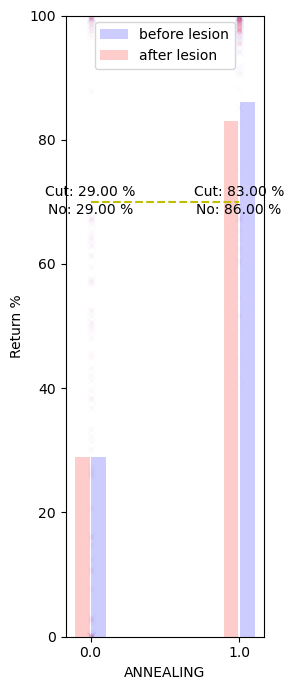

In [19]:
# def plot_returns(data, key):
width = 0.055
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(3,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(np.arange(n_values)+width, 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.1, color='b')
        plt.bar(np.arange(n_values)-width, 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.1, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        # plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.tight_layout()
        plt.legend()
        plt.show()

[0.0, 1.0]


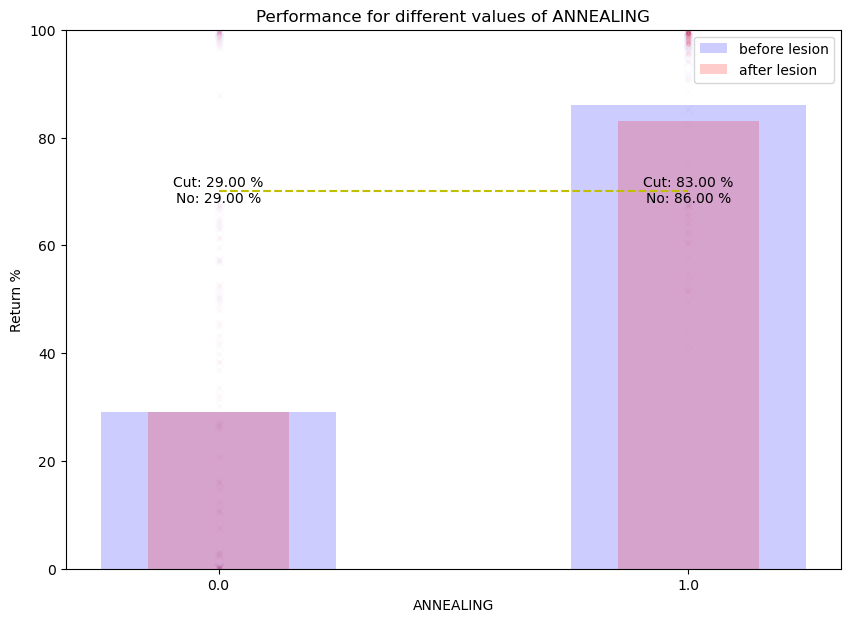

In [6]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(10,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.5, color='b')
        plt.bar(range(n_values), 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.3, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()


Base model parameters
1. `JUMP_MID` = 0.6
2. `JUMP_SLOPE` >= 50 /* higher jump slope causes the night jump to pause when above threshold. Leading to stable model. */
3. `BG_NOISE` anything between 0.05 - 0.15 
4. `REWARD_WINDOW` = 5
5. `LEARNING_RATE_RL` = 0.2 best; 0.1 okay